# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Random seed set as a humble tribute to Michael Jordan
tf.set_random_seed(23)

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

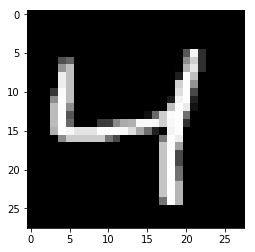

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this  ([`tf.nn.sigmoid_cross_entropy_with_logits`](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 128 # feel free to change this value

# Input and target placeholders
image_size = mnist.train.images.shape[1] # MNIST data input (img shape: 28*28)

input_ = tf.placeholder("float", [None, image_size]) 
labels = tf.placeholder("float", [None, image_size]) 


# Output of hidden layer, single fully connected layer here with ReLU activation
hidden_encoded = tf.layers.dense(input_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(hidden_encoded, image_size)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)

# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

# Sigmoid output from logits
output_decoded = tf.nn.sigmoid(logits)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {input_: batch[0], labels: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)
        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6949
Epoch: 1/20... Training loss: 0.6845
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6613
Epoch: 1/20... Training loss: 0.6456
Epoch: 1/20... Training loss: 0.6259
Epoch: 1/20... Training loss: 0.6044
Epoch: 1/20... Training loss: 0.5778
Epoch: 1/20... Training loss: 0.5471
Epoch: 1/20... Training loss: 0.5188
Epoch: 1/20... Training loss: 0.4893
Epoch: 1/20... Training loss: 0.4557
Epoch: 1/20... Training loss: 0.4301
Epoch: 1/20... Training loss: 0.4027
Epoch: 1/20... Training loss: 0.3804
Epoch: 1/20... Training loss: 0.3616
Epoch: 1/20... Training loss: 0.3505
Epoch: 1/20... Training loss: 0.3326
Epoch: 1/20... Training loss: 0.3173
Epoch: 1/20... Training loss: 0.3136
Epoch: 1/20... Training loss: 0.3094
Epoch: 1/20... Training loss: 0.3065
Epoch: 1/20... Training loss: 0.3088
Epoch: 1/20... Training loss: 0.2923
Epoch: 1/20... Training loss: 0.2967
Epoch: 1/20... Training loss: 0.2919
Epoch: 1/20... Training loss: 0.2897
E

Epoch: 1/20... Training loss: 0.1418
Epoch: 1/20... Training loss: 0.1414
Epoch: 1/20... Training loss: 0.1376
Epoch: 1/20... Training loss: 0.1387
Epoch: 1/20... Training loss: 0.1407
Epoch: 1/20... Training loss: 0.1389
Epoch: 1/20... Training loss: 0.1414
Epoch: 1/20... Training loss: 0.1354
Epoch: 1/20... Training loss: 0.1400
Epoch: 1/20... Training loss: 0.1408
Epoch: 1/20... Training loss: 0.1316
Epoch: 1/20... Training loss: 0.1353
Epoch: 1/20... Training loss: 0.1358
Epoch: 1/20... Training loss: 0.1339
Epoch: 1/20... Training loss: 0.1354
Epoch: 1/20... Training loss: 0.1373
Epoch: 1/20... Training loss: 0.1303
Epoch: 1/20... Training loss: 0.1358
Epoch: 1/20... Training loss: 0.1370
Epoch: 1/20... Training loss: 0.1382
Epoch: 1/20... Training loss: 0.1394
Epoch: 1/20... Training loss: 0.1338
Epoch: 1/20... Training loss: 0.1386
Epoch: 1/20... Training loss: 0.1321
Epoch: 1/20... Training loss: 0.1311
Epoch: 1/20... Training loss: 0.1302
Epoch: 1/20... Training loss: 0.1359
E

Epoch: 2/20... Training loss: 0.1067
Epoch: 2/20... Training loss: 0.1061
Epoch: 2/20... Training loss: 0.1093
Epoch: 2/20... Training loss: 0.1074
Epoch: 2/20... Training loss: 0.1044
Epoch: 2/20... Training loss: 0.1053
Epoch: 2/20... Training loss: 0.1086
Epoch: 2/20... Training loss: 0.1072
Epoch: 2/20... Training loss: 0.1046
Epoch: 2/20... Training loss: 0.1019
Epoch: 2/20... Training loss: 0.1079
Epoch: 2/20... Training loss: 0.1081
Epoch: 2/20... Training loss: 0.1052
Epoch: 2/20... Training loss: 0.1036
Epoch: 2/20... Training loss: 0.1019
Epoch: 2/20... Training loss: 0.1052
Epoch: 2/20... Training loss: 0.1067
Epoch: 2/20... Training loss: 0.1066
Epoch: 2/20... Training loss: 0.1032
Epoch: 2/20... Training loss: 0.1071
Epoch: 2/20... Training loss: 0.1072
Epoch: 2/20... Training loss: 0.1022
Epoch: 2/20... Training loss: 0.1058
Epoch: 2/20... Training loss: 0.1024
Epoch: 2/20... Training loss: 0.1051
Epoch: 2/20... Training loss: 0.1025
Epoch: 2/20... Training loss: 0.1019
E

Epoch: 3/20... Training loss: 0.0928
Epoch: 3/20... Training loss: 0.0911
Epoch: 3/20... Training loss: 0.0920
Epoch: 3/20... Training loss: 0.0933
Epoch: 3/20... Training loss: 0.0900
Epoch: 3/20... Training loss: 0.0912
Epoch: 3/20... Training loss: 0.0901
Epoch: 3/20... Training loss: 0.0927
Epoch: 3/20... Training loss: 0.0901
Epoch: 3/20... Training loss: 0.0908
Epoch: 3/20... Training loss: 0.0927
Epoch: 3/20... Training loss: 0.0913
Epoch: 3/20... Training loss: 0.0915
Epoch: 3/20... Training loss: 0.0890
Epoch: 3/20... Training loss: 0.0912
Epoch: 3/20... Training loss: 0.0938
Epoch: 3/20... Training loss: 0.0907
Epoch: 3/20... Training loss: 0.0900
Epoch: 3/20... Training loss: 0.0904
Epoch: 3/20... Training loss: 0.0926
Epoch: 3/20... Training loss: 0.0871
Epoch: 3/20... Training loss: 0.0925
Epoch: 3/20... Training loss: 0.0940
Epoch: 3/20... Training loss: 0.0893
Epoch: 3/20... Training loss: 0.0907
Epoch: 3/20... Training loss: 0.0932
Epoch: 3/20... Training loss: 0.0905
E

Epoch: 4/20... Training loss: 0.0846
Epoch: 4/20... Training loss: 0.0817
Epoch: 4/20... Training loss: 0.0828
Epoch: 4/20... Training loss: 0.0851
Epoch: 4/20... Training loss: 0.0845
Epoch: 4/20... Training loss: 0.0823
Epoch: 4/20... Training loss: 0.0833
Epoch: 4/20... Training loss: 0.0835
Epoch: 4/20... Training loss: 0.0828
Epoch: 4/20... Training loss: 0.0823
Epoch: 4/20... Training loss: 0.0810
Epoch: 4/20... Training loss: 0.0848
Epoch: 4/20... Training loss: 0.0810
Epoch: 4/20... Training loss: 0.0812
Epoch: 4/20... Training loss: 0.0865
Epoch: 4/20... Training loss: 0.0823
Epoch: 4/20... Training loss: 0.0808
Epoch: 4/20... Training loss: 0.0847
Epoch: 4/20... Training loss: 0.0834
Epoch: 4/20... Training loss: 0.0838
Epoch: 4/20... Training loss: 0.0820
Epoch: 4/20... Training loss: 0.0813
Epoch: 4/20... Training loss: 0.0809
Epoch: 4/20... Training loss: 0.0815
Epoch: 4/20... Training loss: 0.0816
Epoch: 4/20... Training loss: 0.0830
Epoch: 4/20... Training loss: 0.0835
E

Epoch: 4/20... Training loss: 0.0785
Epoch: 4/20... Training loss: 0.0776
Epoch: 4/20... Training loss: 0.0792
Epoch: 4/20... Training loss: 0.0787
Epoch: 4/20... Training loss: 0.0799
Epoch: 4/20... Training loss: 0.0775
Epoch: 4/20... Training loss: 0.0786
Epoch: 4/20... Training loss: 0.0798
Epoch: 4/20... Training loss: 0.0789
Epoch: 4/20... Training loss: 0.0812
Epoch: 4/20... Training loss: 0.0799
Epoch: 4/20... Training loss: 0.0771
Epoch: 4/20... Training loss: 0.0786
Epoch: 4/20... Training loss: 0.0802
Epoch: 4/20... Training loss: 0.0769
Epoch: 4/20... Training loss: 0.0800
Epoch: 4/20... Training loss: 0.0784
Epoch: 4/20... Training loss: 0.0782
Epoch: 4/20... Training loss: 0.0750
Epoch: 4/20... Training loss: 0.0804
Epoch: 4/20... Training loss: 0.0804
Epoch: 4/20... Training loss: 0.0765
Epoch: 5/20... Training loss: 0.0791
Epoch: 5/20... Training loss: 0.0789
Epoch: 5/20... Training loss: 0.0755
Epoch: 5/20... Training loss: 0.0778
Epoch: 5/20... Training loss: 0.0784
E

Epoch: 5/20... Training loss: 0.0751
Epoch: 5/20... Training loss: 0.0769
Epoch: 5/20... Training loss: 0.0751
Epoch: 5/20... Training loss: 0.0749
Epoch: 5/20... Training loss: 0.0764
Epoch: 5/20... Training loss: 0.0746
Epoch: 5/20... Training loss: 0.0740
Epoch: 5/20... Training loss: 0.0761
Epoch: 5/20... Training loss: 0.0778
Epoch: 5/20... Training loss: 0.0751
Epoch: 5/20... Training loss: 0.0742
Epoch: 5/20... Training loss: 0.0748
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0754
Epoch: 5/20... Training loss: 0.0766
Epoch: 5/20... Training loss: 0.0729
Epoch: 5/20... Training loss: 0.0774
Epoch: 5/20... Training loss: 0.0738
Epoch: 5/20... Training loss: 0.0755
Epoch: 5/20... Training loss: 0.0746
Epoch: 5/20... Training loss: 0.0768
Epoch: 5/20... Training loss: 0.0736
Epoch: 5/20... Training loss: 0.0738
Epoch: 5/20... Training loss: 0.0777
Epoch: 5/20... Training loss: 0.0760
Epoch: 5/20... Training loss: 0.0737
Epoch: 5/20... Training loss: 0.0762
E

Epoch: 6/20... Training loss: 0.0737
Epoch: 6/20... Training loss: 0.0732
Epoch: 6/20... Training loss: 0.0738
Epoch: 6/20... Training loss: 0.0735
Epoch: 6/20... Training loss: 0.0730
Epoch: 6/20... Training loss: 0.0752
Epoch: 6/20... Training loss: 0.0737
Epoch: 6/20... Training loss: 0.0732
Epoch: 6/20... Training loss: 0.0736
Epoch: 6/20... Training loss: 0.0749
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0736
Epoch: 6/20... Training loss: 0.0735
Epoch: 6/20... Training loss: 0.0740
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0719
Epoch: 6/20... Training loss: 0.0751
Epoch: 6/20... Training loss: 0.0715
Epoch: 6/20... Training loss: 0.0731
Epoch: 6/20... Training loss: 0.0756
Epoch: 6/20... Training loss: 0.0752
Epoch: 6/20... Training loss: 0.0724
Epoch: 6/20... Training loss: 0.0731
Epoch: 6/20... Training loss: 0.0735
Epoch: 6/20... Training loss: 0.0744
E

Epoch: 7/20... Training loss: 0.0742
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0735
Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0700
Epoch: 7/20... Training loss: 0.0712
Epoch: 7/20... Training loss: 0.0718
Epoch: 7/20... Training loss: 0.0732
Epoch: 7/20... Training loss: 0.0734
Epoch: 7/20... Training loss: 0.0711
Epoch: 7/20... Training loss: 0.0716
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0714
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0691
Epoch: 7/20... Training loss: 0.0719
Epoch: 7/20... Training loss: 0.0718
Epoch: 7/20... Training loss: 0.0746
Epoch: 7/20... Training loss: 0.0719
Epoch: 7/20... Training loss: 0.0720
Epoch: 7/20... Training loss: 0.0734
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0721
Epoch: 7/20... Training loss: 0.0729
Epoch: 7/20... Training loss: 0.0721
E

Epoch: 8/20... Training loss: 0.0733
Epoch: 8/20... Training loss: 0.0709
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0709
Epoch: 8/20... Training loss: 0.0713
Epoch: 8/20... Training loss: 0.0679
Epoch: 8/20... Training loss: 0.0695
Epoch: 8/20... Training loss: 0.0708
Epoch: 8/20... Training loss: 0.0681
Epoch: 8/20... Training loss: 0.0700
Epoch: 8/20... Training loss: 0.0708
Epoch: 8/20... Training loss: 0.0712
Epoch: 8/20... Training loss: 0.0718
Epoch: 8/20... Training loss: 0.0726
Epoch: 8/20... Training loss: 0.0706
Epoch: 8/20... Training loss: 0.0699
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0723
Epoch: 8/20... Training loss: 0.0714
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0719
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0697
Epoch: 8/20... Training loss: 0.0712
Epoch: 8/20... Training loss: 0.0696
Epoch: 8/20... Training loss: 0.0725
Epoch: 8/20... Training loss: 0.0723
E

Epoch: 8/20... Training loss: 0.0693
Epoch: 8/20... Training loss: 0.0713
Epoch: 8/20... Training loss: 0.0699
Epoch: 8/20... Training loss: 0.0711
Epoch: 8/20... Training loss: 0.0692
Epoch: 8/20... Training loss: 0.0671
Epoch: 8/20... Training loss: 0.0710
Epoch: 8/20... Training loss: 0.0711
Epoch: 8/20... Training loss: 0.0713
Epoch: 8/20... Training loss: 0.0706
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0707
Epoch: 8/20... Training loss: 0.0696
Epoch: 8/20... Training loss: 0.0722
Epoch: 8/20... Training loss: 0.0706
Epoch: 8/20... Training loss: 0.0722
Epoch: 8/20... Training loss: 0.0714
Epoch: 8/20... Training loss: 0.0711
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0686
Epoch: 8/20... Training loss: 0.0705
Epoch: 8/20... Training loss: 0.0708
Epoch: 8/20... Training loss: 0.0706
Epoch: 8/20... Training loss: 0.0696
Epoch: 8/20... Training loss: 0.0724
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0709
E

Epoch: 9/20... Training loss: 0.0686
Epoch: 9/20... Training loss: 0.0686
Epoch: 9/20... Training loss: 0.0684
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0695
Epoch: 9/20... Training loss: 0.0712
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0677
Epoch: 9/20... Training loss: 0.0704
Epoch: 9/20... Training loss: 0.0704
Epoch: 9/20... Training loss: 0.0709
Epoch: 9/20... Training loss: 0.0687
Epoch: 9/20... Training loss: 0.0685
Epoch: 9/20... Training loss: 0.0689
Epoch: 9/20... Training loss: 0.0703
Epoch: 9/20... Training loss: 0.0703
Epoch: 9/20... Training loss: 0.0677
Epoch: 9/20... Training loss: 0.0722
Epoch: 9/20... Training loss: 0.0698
Epoch: 9/20... Training loss: 0.0695
Epoch: 9/20... Training loss: 0.0685
Epoch: 9/20... Training loss: 0.0686
Epoch: 9/20... Training loss: 0.0705
Epoch: 9/20... Training loss: 0.0709
Epoch: 9/20... Training loss: 0.0713
Epoch: 9/20... Training loss: 0.0698
Epoch: 9/20... Training loss: 0.0704
E

Epoch: 10/20... Training loss: 0.0691
Epoch: 10/20... Training loss: 0.0675
Epoch: 10/20... Training loss: 0.0679
Epoch: 10/20... Training loss: 0.0702
Epoch: 10/20... Training loss: 0.0688
Epoch: 10/20... Training loss: 0.0683
Epoch: 10/20... Training loss: 0.0680
Epoch: 10/20... Training loss: 0.0705
Epoch: 10/20... Training loss: 0.0677
Epoch: 10/20... Training loss: 0.0699
Epoch: 10/20... Training loss: 0.0681
Epoch: 10/20... Training loss: 0.0683
Epoch: 10/20... Training loss: 0.0690
Epoch: 10/20... Training loss: 0.0722
Epoch: 10/20... Training loss: 0.0670
Epoch: 10/20... Training loss: 0.0694
Epoch: 10/20... Training loss: 0.0668
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0689
Epoch: 10/20... Training loss: 0.0694
Epoch: 10/20... Training loss: 0.0684
Epoch: 10/20... Training loss: 0.0692
Epoch: 10/20... Training loss: 0.0696
Epoch: 10/20... Training loss: 0.0708
Epoch: 10/20... Training loss: 0.0684
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0688
Epoch: 11/20... Training loss: 0.0659
Epoch: 11/20... Training loss: 0.0690
Epoch: 11/20... Training loss: 0.0665
Epoch: 11/20... Training loss: 0.0700
Epoch: 11/20... Training loss: 0.0683
Epoch: 11/20... Training loss: 0.0675
Epoch: 11/20... Training loss: 0.0678
Epoch: 11/20... Training loss: 0.0658
Epoch: 11/20... Training loss: 0.0696
Epoch: 11/20... Training loss: 0.0695
Epoch: 11/20... Training loss: 0.0675
Epoch: 11/20... Training loss: 0.0686
Epoch: 11/20... Training loss: 0.0658
Epoch: 11/20... Training loss: 0.0684
Epoch: 11/20... Training loss: 0.0694
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0680
Epoch: 11/20... Training loss: 0.0693
Epoch: 11/20... Training loss: 0.0685
Epoch: 11/20... Training loss: 0.0691
Epoch: 11/20... Training loss: 0.0658
Epoch: 11/20... Training loss: 0.0686
Epoch: 11/20... Training loss: 0.0697
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0693
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0692
Epoch: 11/20... Training loss: 0.0680
Epoch: 11/20... Training loss: 0.0699
Epoch: 11/20... Training loss: 0.0679
Epoch: 11/20... Training loss: 0.0689
Epoch: 11/20... Training loss: 0.0683
Epoch: 11/20... Training loss: 0.0697
Epoch: 11/20... Training loss: 0.0669
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0693
Epoch: 11/20... Training loss: 0.0683
Epoch: 11/20... Training loss: 0.0666
Epoch: 11/20... Training loss: 0.0665
Epoch: 11/20... Training loss: 0.0689
Epoch: 11/20... Training loss: 0.0695
Epoch: 11/20... Training loss: 0.0694
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0666
Epoch: 11/20... Training loss: 0.0663
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0699
Epoch: 11/20... Training loss: 0.0676
Epoch: 11/20... Training loss: 0.0686
Epoch: 11/20... Training loss: 0.0684
Epoch: 11/20... Training loss: 0.0670
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0654
Epoch: 12/20... Training loss: 0.0682
Epoch: 12/20... Training loss: 0.0682
Epoch: 12/20... Training loss: 0.0683
Epoch: 12/20... Training loss: 0.0678
Epoch: 12/20... Training loss: 0.0688
Epoch: 12/20... Training loss: 0.0673
Epoch: 12/20... Training loss: 0.0672
Epoch: 12/20... Training loss: 0.0661
Epoch: 12/20... Training loss: 0.0696
Epoch: 12/20... Training loss: 0.0677
Epoch: 12/20... Training loss: 0.0695
Epoch: 12/20... Training loss: 0.0695
Epoch: 12/20... Training loss: 0.0672
Epoch: 12/20... Training loss: 0.0666
Epoch: 12/20... Training loss: 0.0690
Epoch: 12/20... Training loss: 0.0685
Epoch: 12/20... Training loss: 0.0678
Epoch: 12/20... Training loss: 0.0675
Epoch: 12/20... Training loss: 0.0688
Epoch: 12/20... Training loss: 0.0658
Epoch: 12/20... Training loss: 0.0686
Epoch: 12/20... Training loss: 0.0668
Epoch: 12/20... Training loss: 0.0659
Epoch: 12/20... Training loss: 0.0655
Epoch: 12/20... Training loss: 0.0680
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0658
Epoch: 13/20... Training loss: 0.0667
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0665
Epoch: 13/20... Training loss: 0.0671
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0677
Epoch: 13/20... Training loss: 0.0669
Epoch: 13/20... Training loss: 0.0698
Epoch: 13/20... Training loss: 0.0658
Epoch: 13/20... Training loss: 0.0693
Epoch: 13/20... Training loss: 0.0671
Epoch: 13/20... Training loss: 0.0668
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0678
Epoch: 13/20... Training loss: 0.0686
Epoch: 13/20... Training loss: 0.0664
Epoch: 13/20... Training loss: 0.0662
Epoch: 13/20... Training loss: 0.0666
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20... Training loss: 0.0678
Epoch: 13/20... Training loss: 0.0681
Epoch: 13/20... Training loss: 0.0666
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20... Training loss: 0.0661
Epoch: 13/20... Training loss: 0.0671
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0659
Epoch: 14/20... Training loss: 0.0671
Epoch: 14/20... Training loss: 0.0686
Epoch: 14/20... Training loss: 0.0693
Epoch: 14/20... Training loss: 0.0671
Epoch: 14/20... Training loss: 0.0668
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20... Training loss: 0.0694
Epoch: 14/20... Training loss: 0.0665
Epoch: 14/20... Training loss: 0.0672
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0674
Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0662
Epoch: 14/20... Training loss: 0.0688
Epoch: 14/20... Training loss: 0.0689
Epoch: 14/20... Training loss: 0.0687
Epoch: 14/20... Training loss: 0.0673
Epoch: 14/20... Training loss: 0.0682
Epoch: 14/20... Training loss: 0.0680
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0676
Epoch: 14/20... Training loss: 0.0674
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0667
Epoch: 14/20... Training loss: 0.0682
Epoch: 14/20... Training loss: 0.0681
Epoch: 14/20... Training loss: 0.0660
Epoch: 14/20... Training loss: 0.0687
Epoch: 14/20... Training loss: 0.0687
Epoch: 14/20... Training loss: 0.0680
Epoch: 14/20... Training loss: 0.0666
Epoch: 14/20... Training loss: 0.0648
Epoch: 14/20... Training loss: 0.0685
Epoch: 14/20... Training loss: 0.0687
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0657
Epoch: 14/20... Training loss: 0.0672
Epoch: 14/20... Training loss: 0.0660
Epoch: 14/20... Training loss: 0.0679
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0662
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20... Training loss: 0.0679
Epoch: 14/20... Training loss: 0.0656
Epoch: 14/20... Training loss: 0.0690
Epoch: 14/20... Training loss: 0.0657
Epoch: 14/20... Training loss: 0.0685
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0672
Epoch: 15/20... Training loss: 0.0658
Epoch: 15/20... Training loss: 0.0658
Epoch: 15/20... Training loss: 0.0676
Epoch: 15/20... Training loss: 0.0666
Epoch: 15/20... Training loss: 0.0659
Epoch: 15/20... Training loss: 0.0687
Epoch: 15/20... Training loss: 0.0689
Epoch: 15/20... Training loss: 0.0659
Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20... Training loss: 0.0673
Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20... Training loss: 0.0680
Epoch: 15/20... Training loss: 0.0674
Epoch: 15/20... Training loss: 0.0660
Epoch: 15/20... Training loss: 0.0668
Epoch: 15/20... Training loss: 0.0684
Epoch: 15/20... Training loss: 0.0658
Epoch: 15/20... Training loss: 0.0667
Epoch: 15/20... Training loss: 0.0676
Epoch: 15/20... Training loss: 0.0670
Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20... Training loss: 0.0659
Epoch: 15/20... Training loss: 0.0683
Epoch: 15/20... Training loss: 0.0653
Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0668
Epoch: 16/20... Training loss: 0.0655
Epoch: 16/20... Training loss: 0.0694
Epoch: 16/20... Training loss: 0.0663
Epoch: 16/20... Training loss: 0.0665
Epoch: 16/20... Training loss: 0.0680
Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0662
Epoch: 16/20... Training loss: 0.0663
Epoch: 16/20... Training loss: 0.0670
Epoch: 16/20... Training loss: 0.0661
Epoch: 16/20... Training loss: 0.0683
Epoch: 16/20... Training loss: 0.0677
Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0658
Epoch: 16/20... Training loss: 0.0667
Epoch: 16/20... Training loss: 0.0680
Epoch: 16/20... Training loss: 0.0675
Epoch: 16/20... Training loss: 0.0681
Epoch: 16/20... Training loss: 0.0681
Epoch: 16/20... Training loss: 0.0687
Epoch: 16/20... Training loss: 0.0676
Epoch: 16/20... Training loss: 0.0665
Epoch: 16/20... Training loss: 0.0657
Epoch: 16/20... Training loss: 0.0674
Epoch: 16/20... Training loss: 0.0662
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0665
Epoch: 17/20... Training loss: 0.0669
Epoch: 17/20... Training loss: 0.0672
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0650
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0663
Epoch: 17/20... Training loss: 0.0657
Epoch: 17/20... Training loss: 0.0663
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0689
Epoch: 17/20... Training loss: 0.0659
Epoch: 17/20... Training loss: 0.0665
Epoch: 17/20... Training loss: 0.0684
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0674
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0677
Epoch: 17/20... Training loss: 0.0673
Epoch: 17/20... Training loss: 0.0666
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0651
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0650
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0664
Epoch: 18/20... Training loss: 0.0663
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0677
Epoch: 18/20... Training loss: 0.0683
Epoch: 18/20... Training loss: 0.0667
Epoch: 18/20... Training loss: 0.0652
Epoch: 18/20... Training loss: 0.0664
Epoch: 18/20... Training loss: 0.0656
Epoch: 18/20... Training loss: 0.0679
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0673
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20... Training loss: 0.0669
Epoch: 18/20... Training loss: 0.0664
Epoch: 18/20... Training loss: 0.0669
Epoch: 18/20... Training loss: 0.0654
Epoch: 18/20... Training loss: 0.0663
Epoch: 18/20... Training loss: 0.0672
Epoch: 18/20... Training loss: 0.0652
Epoch: 18/20... Training loss: 0.0655
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0648
Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0657
Epoch: 18/20... Training loss: 0.0658
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0655
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0686
Epoch: 18/20... Training loss: 0.0666
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0679
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20... Training loss: 0.0651
Epoch: 18/20... Training loss: 0.0685
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0671
Epoch: 18/20... Training loss: 0.0654
Epoch: 18/20... Training loss: 0.0653
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0675
Epoch: 18/20... Training loss: 0.0668
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0658
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0664
Epoch: 19/20... Training loss: 0.0662
Epoch: 19/20... Training loss: 0.0653
Epoch: 19/20... Training loss: 0.0690
Epoch: 19/20... Training loss: 0.0653
Epoch: 19/20... Training loss: 0.0651
Epoch: 19/20... Training loss: 0.0656
Epoch: 19/20... Training loss: 0.0665
Epoch: 19/20... Training loss: 0.0658
Epoch: 19/20... Training loss: 0.0659
Epoch: 19/20... Training loss: 0.0661
Epoch: 19/20... Training loss: 0.0648
Epoch: 19/20... Training loss: 0.0651
Epoch: 19/20... Training loss: 0.0642
Epoch: 19/20... Training loss: 0.0671
Epoch: 19/20... Training loss: 0.0664
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20... Training loss: 0.0663
Epoch: 19/20... Training loss: 0.0687
Epoch: 19/20... Training loss: 0.0670
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0646
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0644
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0669
Epoch: 20/20... Training loss: 0.0659
Epoch: 20/20... Training loss: 0.0674
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0676
Epoch: 20/20... Training loss: 0.0665
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0627
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0646
Epoch: 20/20... Training loss: 0.0654
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0640
Epoch: 20/20... Training loss: 0.0643
Epoch: 20/20... Training loss: 0.0655
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

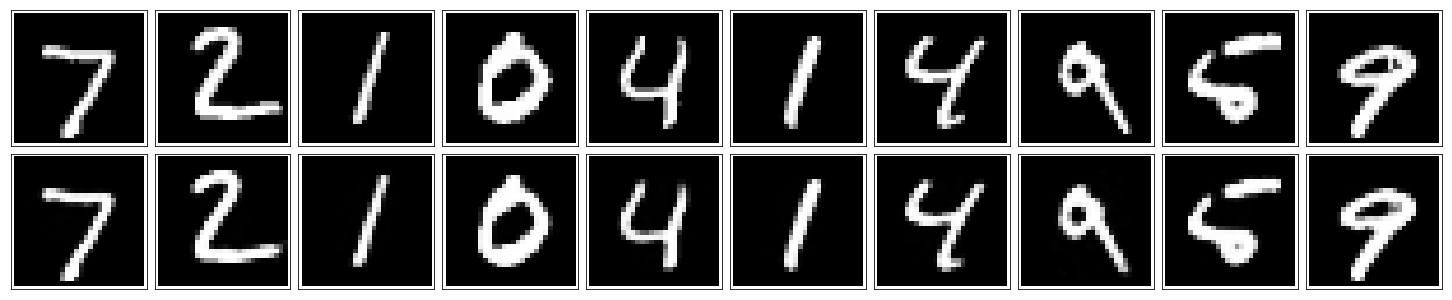

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
#reconstructed, compressed = sess.run([output_decoded, hidden_encoded], feed_dict={input_: in_imgs})
reconstructed = sess.run(output_decoded, feed_dict={input_: in_imgs})


for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.